In [1]:
# %pip install moviepy
# %pip install audiofile

In [2]:
# 비디오파일 -> 오디오 파일 전환
# from moviepy.editor import VideoFileClip

# video_file = 'C:/Users/juneh/OneDrive/바탕 화면/24_1nd Semester/종합설계/modeling/data/india_en_utube.mp4'
# audio_file = 'C:/Users/juneh/OneDrive/바탕 화면/24_1nd Semester/종합설계/modeling/data/india_en_utube.wav'

# video_clip = VideoFileClip(video_file)
# audio_clip = video_clip.audio
# audio_clip.write_audiofile(audio_file)

In [27]:
import numpy as np
import librosa

def split_audio_by_silence(audio_file, min_silence_duration):
    # 오디오 파일 로드
    audio, sr = librosa.load(audio_file, sr=16000)
    
    # 정적인 구간 찾기
    intervals = librosa.effects.split(audio, top_db=40, frame_length=2048, hop_length=512)
    
    # 정적인 구간을 기반으로 오디오 분할
    audio_parts = []
    for interval in intervals:
        start, end = interval
        duration = end - start
        if duration >= min_silence_duration:
            audio_part = audio[start:end]
            audio_parts.append(audio_part)
    
    return audio_parts

# 사용 예시
audio_file = 'C:/Users/juneh/OneDrive/바탕 화면/24_1nd Semester/종합설계/modeling/data/long_audio_3.wav'
min_silence_duration = 16  # 정적인 구간의 최소 지속 시간 (초)
audio_parts = split_audio_by_silence(audio_file, min_silence_duration)

top_db -> 이 값은 데시벨(dB) 단위로 표시되며, 이 값보다 작은 데시벨 값의 소리는 정적으로 간주  
frame_length -> 오디오 신호를 분석할 때 사용하는 프레임의 길이 / 오디오 신호를 2048개의 샘플로 이루어진 프레임으로 분석  
hop_length -> 프레임 간의 간격을 결정하는 값 / 이는 각 프레임이 오디오 신호에서 512개의 샘플 간격으로 이동하면서 분석  

In [30]:
num_audio_files = len(audio_parts)
print("Number of audio files:", num_audio_files)

Number of audio files: 139


In [31]:
from transformers import pipeline
import soundfile as sf

# ASR 파이프라인 초기화
model_name_or_path = "C:/Users/juneh/OneDrive/바탕 화면/24_1nd Semester/종합설계/modeling/whisper_small_0428"
asr = pipeline(model=model_name_or_path, task="automatic-speech-recognition")

# ASR 함수 정의
def transcribe_audio(audio_file):
    # 오디오 파일 로드
    audio, sr = librosa.load(audio_file, sr=None)
    
    # 음성 데이터를 파이프라인에 전달
    transcription = asr(audio)
    return transcription['text']  # 텍스트 추출

# 분할된 오디오 부분을 순차적으로 모델에 입력하고 결과를 출력
for audio_part in audio_parts:
    # soundfile 라이브러리를 사용하여 오디오 데이터를 wav 파일 형식으로 저장
    sf.write('temp.wav', audio_part, 16000)  # 샘플링 레이트를 16000Hz로 설정
    
    # 오디오 데이터를 모델에 입력하고 결과를 출력
    transcription_text = transcribe_audio('temp.wav')
    print("텍스트 출력:", transcription_text)
    print()

c:\Users\juneh\AppData\Local\Programs\Python\Python37\lib\site-packages\transformers\generation\utils.py:1357: UserWarning: Using `max_length`'s default (448) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


텍스트 출력: hello my name is an boon welcome to

텍스트 출력: a my you to janet and a to day i wanted to a you know introduce the indian accent to you and i am very well aware that there is a

텍스트 출력: ever arabic variety over

텍스트 출력: in the accent and not just in the other as a sultan pakistan and

텍스트 출력: in all of it is at asia different accent but i want to do introduce to you the south indian accent

텍스트 출력: you know i am very interested in accidents and i

텍스트 출력: and you know if you ever interested in learning the indian accent and

텍스트 출력: behave you have a uniting or the way you have to line in the accent

텍스트 출력: this video will cover the basics of

텍스트 출력: the indian accent as i without further a day

텍스트 출력: as gestorians

텍스트 출력: he might again between the train and the path

텍스트 출력: let's just

텍스트 출력: address the

텍스트 출력: elephant in the rain

텍스트 출력: you are clearly

텍스트 출력: judging me on my indian accent when

텍스트 출력: i

텍스트 출력: you know also passion about like you know identit

(유튜브영상) 영상길이 4분  
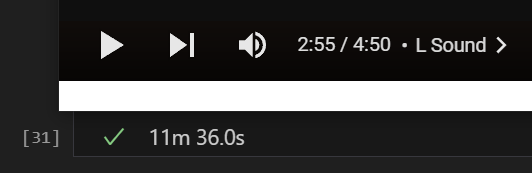

[유튜브주소]https://www.youtube.com/watch?v=z7MIyQS9p5E&t=175s

.